
# Project: Investigate a Dataset (IMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that I have chosen is the internet movie database data. Being a movie buff, I didn't have to think twice about choosing a data set. Today I wanna explore the different things about movies which I couldn't while watching a movie, like the taste and poplular genres of people over time, etc. 

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
movies_df = pd.read_csv('tmdb-movies.csv')

In [4]:
# printing out the columns.
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> This dataset clearly has a lot of interesting fields, now let us look into the integrity of the data and pick out the ones we could use.

<a id='wrangling'></a>
## Data Wrangling

> The major data part I wanna focus on are the data involving the genre of the movies, the year in which they were released, the budget, the revenue made, runtime, etc. My goal is to compare the trends and results of the movies from the last 30 years to the ones before that.

### General Properties

In [5]:
#printing out the head of the dataframe
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#checking out the different genres involved in the dataset
genres_set = set()
for genres in movies_df.genres:
    for genre in str(genres).split('|'):
        genres_set.add(genre)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'nan'}

##### Genres
> As we can see there are a wide range of genres for a single movie itself. And also clubbing genres is not that easily possible so the study will be carried out by taking in account all the different genres. One thing we can point out is that, some of the movies do not have a genre specified. We can eliminate such movies from our analysis.

In [7]:
def remove_nan(genre_series):
    if(genre_series=='nan'):
        return False
    else:
        return True

In [8]:
movies_df = movies_df[movies_df.genres.apply(remove_nan)]

In [9]:
#checking out the budget and revenue statistics.
movies_df.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [10]:
movies_df.revenue.describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [11]:
rev_budget_ratio = movies_df.revenue/movies_df.budget
rev_budget_ratio.describe()

count    6165.000000
mean             inf
std              NaN
min         0.000000
25%         0.138804
50%         1.898151
75%         6.788662
max              inf
dtype: float64

In [12]:
movies_df[movies_df.budget<1000].budget.count()

5755

###### Money data
> As it is very clear, we can see that some of the entries are missing for the budget field. However having 0 in the revenue field is acceptable as movies can come at losses too. Assuming this, we however come to another problem. That is, there are some of the movies that was produced just with a budget less that 1000. This however shows error in the data.
###### Another anomaly
> Another anomaly that I observed is that. For some of the budget revenue pair, their ratio was very odd. That is, while describing the ratio, it is observed that the max value for the ratio was very huge. This indicates that either one of the data that was provided is false.

In [13]:
movies_df.runtime.describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [14]:
movies_df[movies_df.runtime<30].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,231.000000,231.000000,2.310000e+02,2.310000e+02,231.000000,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02
mean,116965.943723,0.354943,3.439301e+05,9.090911e+04,10.337662,49.467532,6.636797,2005.597403,3.932434e+05,1.990284e+05
std,109748.633919,0.622270,3.976399e+06,1.381699e+06,8.423998,69.096388,0.896023,11.931609,4.206744e+06,3.024969e+06
min,530.000000,0.002757,0.000000e+00,0.000000e+00,0.000000,10.000000,3.300000,1963.000000,0.000000e+00,0.000000e+00
25%,26912.500000,0.095969,0.000000e+00,0.000000e+00,4.000000,14.000000,6.050000,2004.500000,0.000000e+00,0.000000e+00
50%,73144.000000,0.226483,0.000000e+00,0.000000e+00,7.000000,24.000000,6.700000,2010.000000,0.000000e+00,0.000000e+00
75%,200342.500000,0.431284,0.000000e+00,0.000000e+00,16.000000,49.000000,7.300000,2013.000000,0.000000e+00,0.000000e+00
max,370687.000000,8.411577,6.000000e+07,2.100000e+07,29.000000,507.000000,8.400000,2015.000000,6.310011e+07,4.597555e+07


In [15]:
movies_df[movies_df.runtime<30].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0
216,286192,tt3824386,0.640151,0,0,Lava,Napua Greig|Kuana Torres Kahele,http://www.pixar.com/short_films/Theatrical-Sh...,James Ford Murphy,NaN,...,The story follows the love story of two volcan...,7,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,6/19/15,298,7.3,2015,0.0,0.0
279,355338,tt4941804,0.442835,0,0,Riley's First Date?,Amy Poehler|Phyllis Smith|Bill Hader|Lewis Bla...,NaN,Josh Cooley,NaN,...,"Riley, now 12, is hanging out at home with her...",5,Animation|Family,Walt Disney Pictures|Pixar Animation Studios,11/3/15,137,7.3,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0


###### Runtime
> As we can see there are some movies with very low runtime. We can eliminate such movies too.

In [16]:
movies_df.popularity.describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

### Data Cleaning 
> The steps taken for clearing some of the problems in the data are described one by one.

###### Inital cleaning
>Stripping off the columns, id, cast, production companies, tagline, website, plot. Because they do not come under
 the current field of study. And also the fields were null values are present, like for budget, revenue, genres, etc.

In [17]:
# Removing the unwanted columns.
movies_df = movies_df.drop(['id', 'imdb_id',
       'cast', 'homepage','tagline', 'keywords', 'overview',
       'production_companies',
       'budget_adj',
       'revenue_adj'], axis=1)

> In our remaining data fields, we want to modify them so that we only take in the necessary fields and drop any unwanted or inaccurate fields.
First off, we extract the month from the release date as our analysis only requires that information.

In [18]:
def extract_month(date):
    month = date.split('/')[0]
    return int(month)

In [19]:
movies_df['release_month'] = movies_df['release_date'].apply(extract_month)

###### Major assumption.
>Since we came across the problem where the budget was not properly entered, that is movies with budget less than 1000 was occured. So only the movies with a budget of over 100,000 is considered for this study.


In [20]:
# Removing the rows where the budget is 0.

movies_df = movies_df[movies_df.budget>100000]

##### Another assumption.
>Since the ratio between the revenue and the budget was a bit absurd, I've decided to remove all the rows in which the ratio was above 100. Assuming that a profit of about 100 times is possible.

In [21]:
rev_budget_ratio = movies_df.revenue/movies_df.budget
movies_df = movies_df[rev_budget_ratio<100]
new_rev_budget_ratio = movies_df.revenue/movies_df.budget
new_rev_budget_ratio.describe()

count    5026.000000
mean        2.994534
std         6.602341
min         0.000000
25%         0.001305
50%         1.229756
75%         3.229909
max        94.076932
dtype: float64

##### The result.
> Now we can see that the maximum ratio that occurs in our data is just over 94 times. This does not seem odd. Atleast, compared to the original data that we were looking into.

In [22]:
movies_df.head()
movies_df.to_csv('cleaned_data_final.csv', sep='\t', encoding='utf-8')
#saving the final cleaned up data to a csv file.

<a id='eda'></a>
## Exploratory Data Analysis


### 1) How does the impact of a movie vary with respect to the time of the year it is released?
> Movies come out at all times of the year. But we look forward to watching movies during the holidays or when we are free. So does that mean that there is a particular time when the movies make the maximum impact? And is it because the movies that come out during this time are particularly very good and attracts people? Let's find out.

In [23]:
#we define two functions to plot line charts and bar charts from the dataframe/series.
def plot_series_line(data, yaxis, xaxis, title):
    data.plot.line()
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.show()

In [24]:
def plot_series_bar(data, yaxis, xaxis, title):
    data.plot.bar()
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.show()

In [62]:
def plot_series_hist(data, yaxis, xaxis, title):
    data.plot.hist(bins=12)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.show()

In [166]:
#We first group the data by their release month and aggregate the mean.
data = movies_df.groupby('release_month').mean()

### Our first observation.
> For our first observation, plotting the variataion of the mean revenue of the different months were plotted against the respective months. The main objective is to determine if some particular months give higher yield compared to the rest.

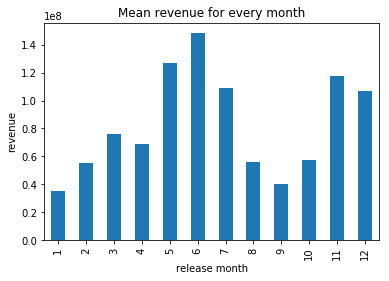

In [167]:
plot_series_bar(data['revenue'], yaxis='revenue', xaxis='release month', title='Mean revenue for every month')

### Holidays sell better
> It is obvious from the given plot that the movies made more revenue during the months of May, June, July, November and December and the average revenue made by movies during the rest of the months are significantly lower. This makes sense because holidays are the best time to watch movies. Moreover, we see the variation of revenue close to the shape of a sine wave. This signifies that the average interest towards movies rises during the holidays and dips during the off holiday time.

##### Plotting the data.
> The data considered for this plot are, revenue, popularity and the average vote count. The data were normalised so that they could be compared easier.

In [168]:
normalised_df = pd.DataFrame(index=np.arange(1, 13, 1), columns=['revenue', 'vote_average', 'popularity'])
normalised_df['revenue'] = (data['revenue']-data['revenue'].min())/(data['revenue'].max()-data['revenue'].min())
normalised_df['vote_average'] = (data['vote_average']-data['vote_average'].min())/(data['vote_average'].max()-data['vote_average'].min())
normalised_df['popularity'] = (data['popularity']-data['popularity'].min())/(data['popularity'].max()-data['popularity'].min())

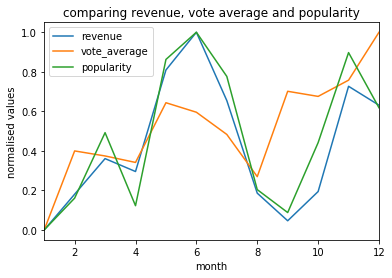

In [169]:
plot_series_line(normalised_df, 'normalised values', 'month', 'comparing revenue, vote average and popularity')

### Better impact than other factors.
> When we compare the variation of factors like the revenue, vote average and populary, it is obvious that the popularity of the movie is inaccordance with the revenue generated by it. That is quite justifiable because popular movies sell better. But the striking result is that, the average popularity of movies is also high during the holiday season. Another striking feature is that these factors(revenue and popularity) are more dependend on the time of the year than the vote average recieved by that movie. This signifies that the movie's quality is only as good as the people willing to watch it for its success.

In [30]:
def plot_scatter(data_1, data_2):
    plt.scatter(data_1, data_2)
    plt.show()

In [46]:
norm_df = pd.DataFrame(index=movies_df.index, columns=movies_df.columns)
norm_df['revenue'] = (movies_df['revenue']-movies_df['revenue'].mean())/movies_df['revenue'].std()
norm_df['vote_average'] = (movies_df['vote_average']-movies_df['vote_average'].mean())/movies_df['vote_average'].std()
norm_df['popularity'] = (movies_df['popularity']-movies_df['popularity'].mean())/movies_df['popularity'].std()
norm_df['vote_count'] = (movies_df['vote_count']-movies_df['vote_count'].mean())/movies_df['vote_count'].std()
norm_df['budget'] = (movies_df['budget']-movies_df['budget'].mean())/movies_df['budget'].std()
norm_df['release_year'] = movies_df['release_year']
m=norm_df[norm_df['release_year']>2010]

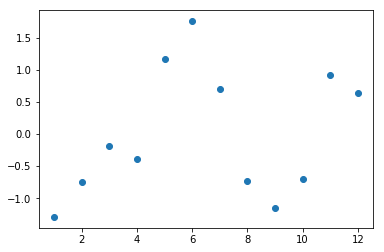

In [55]:
plot_scatter(data_1=normalised_df.index, data_2=normalised_df['revenue'])

In [84]:
genres_series = pd.Series(index=genres_set, data=0)

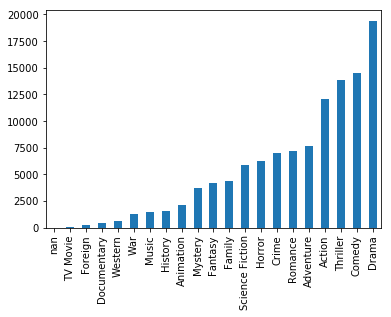

In [97]:
for genres in movies_df[movies_df.release_year<2000].genres:
    for genre in genres.split('|'):
        genres_series[genre] = genres_series[genre]+1
genres_series = genres_series.sort_values()
plot_series_bar(genres_series, '', '', '')

In [170]:
data_list = []
for row in movies_df.itertuples():
    for genre in row[7].split('|'):
        temp = list(row)
        temp[7] = genre
        data_list.append(list(temp)[1:13])
df_n = pd.DataFrame(columns=movies_df.columns, data=data_list)

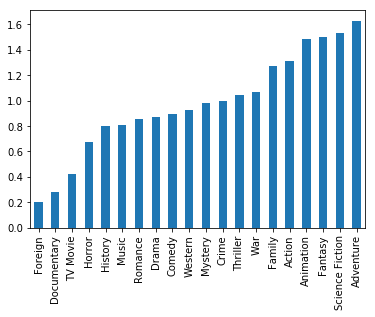

In [152]:
study_data = df_n.groupby('genres').mean()
data = study_data['popularity'].sort_values()
plot_series_bar(data, '', '', '')

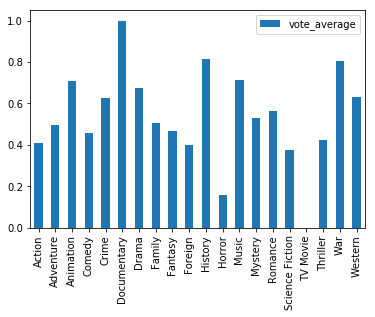

In [175]:
study_data = df_n.groupby('genres').mean()
#normalized_genres_df = pd.DataFrame(columns=study_data.columns, )
study_data = (study_data-study_data.min())/(study_data.max()-study_data.min())
plot_series_bar(study_data[['vote_average']], '', '', '')

### How does other factors compare?
> Comparing the mean revenue generated per month was one way to compare the variation of the movie impact according to the time of the year. Now, let us compare different other factors that determine the quality of a movie. For instance, let us look into other factors. Like, Do good quality movies( ones with higher vote average ) wait till it is the holiday season to generate better revenue? And so does that mean that it will play a major role in generating more revenue during the season? Let us find out.

### 2) How has modern vfx and cgi improved the market of sci-fi movies and various out of the normal plot movies?
> We identify the advent of modern CGI and vfx after Steven Speilberg's Jurrasic Park. It was indeed a spectacular sight. Since then movies started using a lot of this and its use has increased exponentially in such a way that, some critics say that it is robbing us of the reality. Good vfx and CGI are'nt the only things that make a movie great, but has the market of such out of the normal plot movies benefitted from the modern technology?
We analyse movies before the 90s and compare their statistics with the modern ones. Only the movie genres like sci-fi, horror, war, etc where this is applicable are taken into account.

In [33]:
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'nan'}

###### Some further cleaning.
> Since we are looking into movie genres that include pure drama, tha excludes every bit of unnatural plots like, action, adventure, animation, crime, horror, mystery, science fiction, war.

In [34]:
ignored_genres_drama = ['Action',
 'Adventure',
 'Animation',
 'Crime',
 'History',
 'Horror',
 'Mystery',
 'Science Fiction',
 'Thriller',
 'War']

In [35]:
def is_drama(df):
    flag = True
    for genre in str(df).split('|'):
        if(genre in ignored_genres_drama):
            flag = False
            break
    return flag

In [36]:
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'nan'}

> Here we consider movies having either one of Sci-fi, horror, or war to have benefitted from this technological advancement.

In [37]:
vfx_genres = ['Science Fiction', 'Horror', 'War']

In [38]:
#function to determine if a movie comes under this category.
def determine_vfx(genres):
    flag = False
    for genre in str(genres).split('|'):
        if(genre in vfx_genres):
            flag = True
            break
    return flag

In [39]:
# we convert that to a new data frame consisting of only such movies.
vfx_movies_df = movies_df[movies_df['genres'].apply(determine_vfx)]
vfx_movies_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,release_month
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,12
6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,6


>It is pretty obvious that our filtering was able to group movies that uses heavy vfx.


In [40]:
data = vfx_movies_df.groupby('release_year').mean()

In [41]:
plot_series_line(data.popularity.rolling(center=False, window=5).mean())

TypeError: plot_series_line() missing 3 required positional arguments: 'yaxis', 'xaxis', and 'title'

#### The rise of its popularity.
> It is very clear that the technological advancements made a very big impact on the popularity of such films.
Let us now look into the rise of revenue and the overall performance of vfx movies.

In [ ]:
#plotting the mean revenue over the years.
plot_series_line(data.revenue.rolling(center=False, window=5).mean())

In [ ]:
#Here, we take the max because the averaage quality always decreases with the more number of movies coming out.
data = vfx_movies_df.groupby('release_year').max()
plot_series_line(data.vote_average.rolling(window=5, center=False).mean())

In [ ]:
#Finally, we find out the number of such movies per year.
data = vfx_movies_df.groupby('release_year').count()
plot_series_line(data.vote_average.rolling(window=5, center=False).mean())

#### The result.
> We clearly see how the popularity, revenue and the quality of the movies increased with the advent of vfx. We can see that the 80s was the time when people started establishing the success of vfx movies. And since then it never stopped growing, so today we can accurately say that the major money makers of the film industry are vfx movies, all thanks to the new and developing technologies.

<a id='conclusions'></a>
## Conclusions
> So the findings from the two of my posted questions are clear, i.e there is still good scope for old school drama movies. And with the advent of new technologies, film makers are doing their part into incorporating those elements into films.
##### Limitations
> Eventhough I classified movies under drama and movies that have an out of the ordinary plot, the accuracy of the classification cannot be assessed to be a hundred percent true. And I have made my assumptions and findings in light of that. And the accuracy of all the other deductions and conclusions are only as accurate as the data, despite all the data cleaning efforts. Also revenue is restricted by the overall exposure of the movie, like the regions released, etc. So based on available factors, it is impossible to determine a movie that was underrated but deserved much more.
###### Scope for further findings.
>Since the Analysis was strictly secluded to numbers and some keywords, the possibilities of deriving insights are also related. However, by further analysing the plots, critic reviews, we can come to much better and accurate conclusions.